## Name : Mohamed Ashraf Khalaf Hafez / ID : 2205021

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
class Neuralnet(nn.Module):
    def __init__(self):
        super(Neuralnet, self).__init__()
        self.w00 = torch.rand(1, requires_grad=False)
        self.w01 = torch.rand(1, requires_grad=False)
        self.w02 = torch.rand(1, requires_grad=False)
        self.w11 = torch.rand(1, requires_grad=False)
        self.w12 = torch.rand(1, requires_grad=False)
        self.w13 = torch.rand(1, requires_grad=False)
        self.w20 = torch.rand(1, requires_grad=False)


        self.b00 = torch.rand(1, requires_grad=False)
        self.b01 = torch.rand(1, requires_grad=False)
        self.b02 = torch.rand(1, requires_grad=False)

    def forward(self, input):
      input_to_layer_01 = input * self.w00 + self.b00
      layer_01_output = torch.sigmoid(input_to_layer_01)
      layer_01_output = layer_01_output * self.w11

      input_to_layer_02 = input * self.w01 + self.b01
      layer_02_output = F.sigmoid(input_to_layer_02)
      layer_02_output = layer_02_output * self.w12

      input_to_layer_03 = input * self.w02 + self.b02
      layer_03_output = torch.sigmoid(input_to_layer_03)
      layer_03_output = layer_03_output * self.w13

      output = layer_01_output + layer_02_output + layer_03_output

      output = F.tanh(output)
      output = output * self.w20
      return output

model = Neuralnet()

In [32]:
X = torch.linspace(1, 5, 50)
X

tensor([1.0000, 1.0816, 1.1633, 1.2449, 1.3265, 1.4082, 1.4898, 1.5714, 1.6531,
        1.7347, 1.8163, 1.8980, 1.9796, 2.0612, 2.1429, 2.2245, 2.3061, 2.3878,
        2.4694, 2.5510, 2.6327, 2.7143, 2.7959, 2.8776, 2.9592, 3.0408, 3.1224,
        3.2041, 3.2857, 3.3673, 3.4490, 3.5306, 3.6122, 3.6939, 3.7755, 3.8571,
        3.9388, 4.0204, 4.1020, 4.1837, 4.2653, 4.3469, 4.4286, 4.5102, 4.5918,
        4.6735, 4.7551, 4.8367, 4.9184, 5.0000])

In [33]:
Y = model(X)
Y

tensor([0.1296, 0.1306, 0.1316, 0.1326, 0.1336, 0.1346, 0.1355, 0.1364, 0.1373,
        0.1381, 0.1390, 0.1398, 0.1406, 0.1413, 0.1421, 0.1428, 0.1435, 0.1441,
        0.1448, 0.1454, 0.1460, 0.1466, 0.1471, 0.1477, 0.1482, 0.1487, 0.1492,
        0.1496, 0.1501, 0.1505, 0.1509, 0.1513, 0.1517, 0.1521, 0.1525, 0.1528,
        0.1531, 0.1535, 0.1538, 0.1541, 0.1544, 0.1546, 0.1549, 0.1552, 0.1554,
        0.1557, 0.1559, 0.1561, 0.1564, 0.1566])

Text(0, 0.5, 'Y')

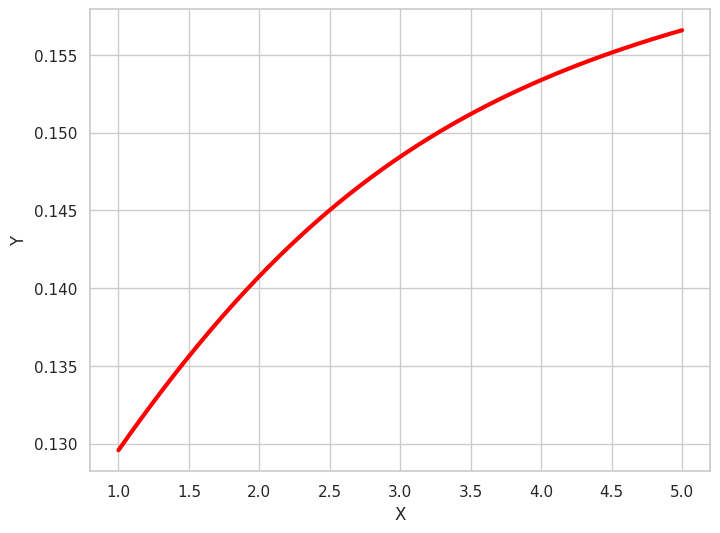

In [34]:
# plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(
    x=X,
    y= model(X).detach(),
    color='red',
    linewidth=3
)
plt.xlabel('X')
plt.ylabel('Y')

In [35]:
class TrainableNN(nn.Module):
    def __init__(self):
        super(TrainableNN, self).__init__()
        self.w00 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w01 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w02 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w11 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w12 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w13 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w20 = nn.Parameter(torch.randn(1, requires_grad=True))

        self.b00 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b01 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b02 = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, input):
      input_to_layer_01 = input * self.w00 + self.b00
      layer_01_output = torch.sigmoid(input_to_layer_01)
      layer_01_output = layer_01_output * self.w11

      input_to_layer_02 = input * self.w01 + self.b01
      layer_02_output = torch.sigmoid(input_to_layer_02)
      layer_02_output = layer_02_output * self.w12

      input_to_layer_03 = input * self.w02 + self.b02
      layer_03_output = torch.sigmoid(input_to_layer_03)
      layer_03_output = layer_03_output * self.w13

      output = layer_01_output + layer_02_output + layer_03_output

      output = F.tanh(output)
      output = output * self.w20
      return output


In [36]:
trainableNN = TrainableNN()
newY=trainableNN(X)

In [38]:
optimizer = SGD(trainableNN.parameters(), lr=0.01)
loss = nn.MSELoss()

for epoch in range(50):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = trainableNN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(24.9823, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(36.6888, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0100, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0018, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0005, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0005, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0005, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0005, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0004, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0004, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0004, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0004, grad_fn=<AddBackward0>)
Epoch:  15  | Tota

In [39]:
pred_y = trainableNN(X)
pred_y

tensor([0.1285, 0.1308, 0.1327, 0.1345, 0.1360, 0.1373, 0.1385, 0.1395, 0.1403,
        0.1410, 0.1417, 0.1422, 0.1427, 0.1431, 0.1435, 0.1439, 0.1443, 0.1446,
        0.1450, 0.1453, 0.1457, 0.1461, 0.1465, 0.1469, 0.1473, 0.1478, 0.1482,
        0.1486, 0.1491, 0.1495, 0.1500, 0.1504, 0.1508, 0.1512, 0.1516, 0.1520,
        0.1524, 0.1527, 0.1531, 0.1534, 0.1537, 0.1540, 0.1542, 0.1544, 0.1546,
        0.1548, 0.1550, 0.1551, 0.1552, 0.1553], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

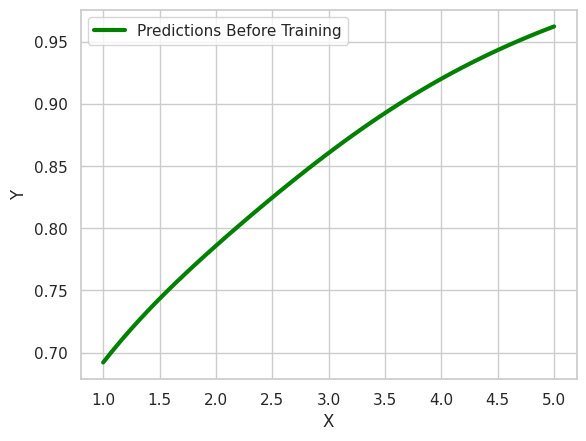

In [48]:
#plot Before
sns.set(style="whitegrid")
sns.lineplot(
    x=X,
    y=newY.detach(),
    color='green',
    linewidth=3,
    label='Predictions Before Training'
)
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

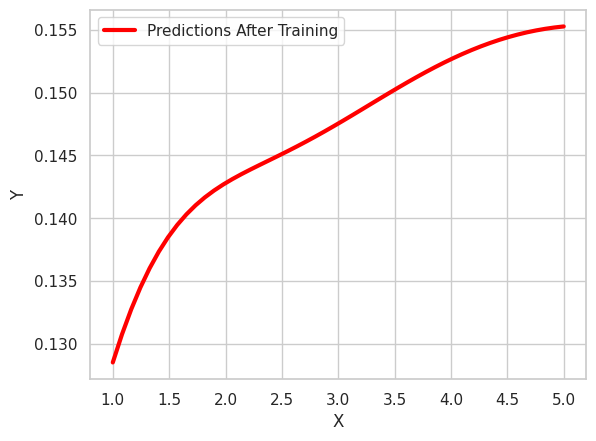

In [49]:
#plot after
sns.set(style="whitegrid")
sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='red',
    linewidth=3,
    label='Predictions After Training'
)

plt.xlabel('X')
plt.ylabel('Y')